#### Read data from file

In [1]:
import numpy as np
import pickle

# dimenstion of fundamental representation for SU(3)
# all momentum broadening components are divided by DR, see Eq. (82) from Sec. VI. of https://arxiv.org/abs/2303.05599
DR = 3

# wong = quarks numerically evolved according to Wong's eqs.
# kappa = momentum broadening extracted from Glasma electric field correlators
results = ["wong", "kappa"]

results_wong = pickle.load(open("mom_broad_wong_beauty_charm.pickle", "rb"))
results_static = pickle.load(open("mom_broad_kappa_infmass_beauty_charm.pickle", "rb"))

mom_broad_wong, mom_broad_static = results_wong["mom_broad"], results_static["mom_broad"]
tau_wong, tau_static = results_wong["tau"], results_static["tau"]

pTs = results_wong["pTs"]

Momentum broadening is stored for beauty and charm quarks formed at $\tau_\mathrm{form}\approx 1/(2m)$ and having initial $p_T(\tau_\mathrm{form})\in\{0, 2, 5, 10\}\,\mathrm{GeV}$

The saturation momentum is $Q_s=2\,\mathrm{GeV}$ with a running coupling constant $g\approx 2.07$

#### Plot the components of the momentum broadening for beauty and charm quark

In [2]:
quarks = results_wong["quarks"]

# iq = 0 beauty quarks
# iq = 1 charm quarks
iq = 0
quark = quarks[iq]

/home/dana/anaconda3/envs/curraun/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  This is separate from the ipykernel package so we can avoid doing imports until


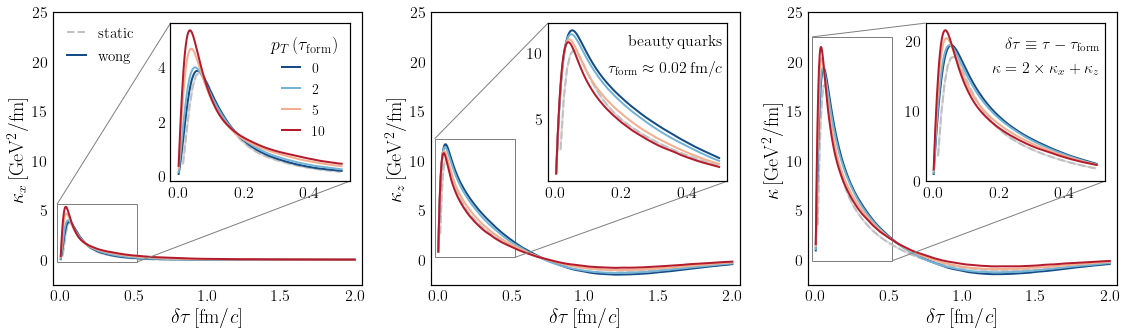

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import mark_inset
from matplotlib.lines import Line2D

plt.style.use('nord_theme_light.mpltstyle')
plt.rcParams["figure.figsize"] = (16, 5)

linestyles = [':', '-.', '--']
cmap_rb = mpl.cm.get_cmap('RdBu', 20)
colors = [cmap_rb(0.9), cmap_rb(0.7), cmap_rb(0.3), cmap_rb(0.1)]

fig, ax = plt.subplots(1, 3)
# list of inset axes
ax_in = []
for axi in ax.flat:
    axi_in = axi.inset_axes([0.38,0.38,0.58,0.58])
    ax_in.append(axi_in)
    mark_inset(axi, axi_in, loc1=2, loc2=4, fc="none", ec='0.5')

# compute + plot kappa components for static quarks (EE Glasma correlator)
tag_static_quark = quarks[iq]
tau_static_quark = np.array(tau_static[tag_static_quark])
tau_diff = tau_static_quark[1:len(tau_static_quark)]

mom_broad_x = mom_broad_static[tag_static_quark][:, 0]/DR
kappa_x = np.diff(mom_broad_x) / np.diff(tau_static_quark)
ax[0].plot(tau_diff, kappa_x, linewidth=2, linestyle='--', color='silver')
ax[0].plot(tau_diff, kappa_x, linewidth=2, color='silver', alpha=0.6)

mom_broad_z = mom_broad_static[tag_static_quark][:, 2]/DR
kappa_z = np.diff(mom_broad_z) / np.diff(tau_static_quark)
ax[1].plot(tau_diff, kappa_z, linewidth=2, linestyle='--', color='silver')
ax[1].plot(tau_diff, kappa_z, linewidth=2, color='silver', alpha=0.6)

kappa = 2*kappa_x + kappa_z
ax[2].plot(tau_diff, kappa, linewidth=2, linestyle='--', color='silver')
ax[2].plot(tau_diff, kappa, linewidth=2, color='silver', alpha=0.6)

# inset axes
tau_lim = 0.5
ax_in[0].plot(tau_diff[tau_diff<tau_lim], kappa_x[tau_diff<tau_lim], linewidth=2, linestyle='--', color='silver')
ax_in[0].plot(tau_diff[tau_diff<tau_lim], kappa_x[tau_diff<tau_lim], linewidth=2, color='silver', alpha=0.6)
ax_in[1].plot(tau_diff[tau_diff<tau_lim], kappa_z[tau_diff<tau_lim], linewidth=2, linestyle='--', color='silver')
ax_in[1].plot(tau_diff[tau_diff<tau_lim], kappa_z[tau_diff<tau_lim], linewidth=2, color='silver', alpha=0.6)
ax_in[2].plot(tau_diff[tau_diff<tau_lim], kappa[tau_diff<tau_lim], linewidth=2, linestyle='--', color='silver')
ax_in[2].plot(tau_diff[tau_diff<tau_lim], kappa[tau_diff<tau_lim], linewidth=2, color='silver', alpha=0.6)


# compute + plot kappa components for dynamic quarks (solve Wong)
for ipT, pT in enumerate(pTs):
    tag_wong_quark = quarks[iq] + "_pT_" + str(pT)
    tau_wong_quark = tau_wong[tag_wong_quark]
    tau_diff = tau_wong_quark[1:len(tau_wong_quark)]

    mom_broad_x = mom_broad_wong[tag_wong_quark][:, 0]/DR
    kappa_x = np.diff(mom_broad_x) / np.diff(tau_wong_quark)
    ax[0].plot(tau_diff, kappa_x, linewidth=2, color=colors[ipT])

    mom_broad_z = mom_broad_wong[tag_wong_quark][:, 2]/DR
    kappa_z = np.diff(mom_broad_z) / np.diff(tau_wong_quark)
    ax[1].plot(tau_diff, kappa_z, linewidth=2, color=colors[ipT])

    kappa = 2*kappa_x + kappa_z
    ax[2].plot(tau_diff, kappa, linewidth=2, color=colors[ipT])

    # inset axes
    ax_in[0].plot(tau_diff[tau_diff<tau_lim], kappa_x[tau_diff<tau_lim], linewidth=2, color=colors[ipT])
    ax_in[1].plot(tau_diff[tau_diff<tau_lim], kappa_z[tau_diff<tau_lim], linewidth=2, color=colors[ipT])
    ax_in[2].plot(tau_diff[tau_diff<tau_lim], kappa[tau_diff<tau_lim], linewidth=2, color=colors[ipT])


# plot style 
ylabels = [r'$\kappa_x\,\mathrm{[GeV^2/fm]}$', r'$\kappa_z\,\mathrm{[GeV^2/fm]}$', r'$\kappa\,\mathrm{[GeV^2/fm]}$']

for i in range(3):
    ax[i].set_ylabel(ylabels[i])
    ax[i].set_xlabel(r'$\delta\tau\,\mathrm{[fm/}c\mathrm{]}$')
    ax[i].set_xlim(-0.05, 2.05)
    ax[i].set_ylim(-2.5, 25)

    ax[i].tick_params(axis=u'both', which=u'both',length=0)
    ax_in[i].tick_params(axis=u'both', which=u'both',length=0)

# legends
handles, labels = ax_in[0].get_legend_handles_labels()
wong_lines = []
for ipT, pT in enumerate(pTs):
    line = Line2D([0], [0], label=r'${}$'.format(pT), color=colors[ipT], linewidth=2)
    wong_lines.append(line)

handles.extend(wong_lines)
ax_in[0].legend(handles=handles, fontsize=14, title=r'$p_T\,(\tau_\mathrm{form})$')

handles, labels = ax[0].get_legend_handles_labels()
line_static = Line2D([0], [0], label=r'$\mathrm{static}$', linestyle='--', color='silver', linewidth=2)
line_wong = Line2D([0], [0], label=r'$\mathrm{wong}$', color=colors[0], linewidth=2)
handles.extend([line_static, line_wong])
ax[0].legend(handles=handles, fontsize=15, loc='upper left')

# text
if quark=='beauty':
    ax_in[1].text(0.22, 10.5, r'$\mathrm{beauty\,quarks}$', size=16)
    ax_in[1].text(0.16, 8.5, r'$\tau_\mathrm{form}\approx 0.02\,\mathrm{fm/}c$', size=16)

    ax_in[2].text(0.22, 19, r'$\delta\tau\equiv\tau-\tau_\mathrm{form}$', size=16)
    ax_in[2].text(0.18, 15.5, r'$\kappa=2\times\kappa_x+\kappa_z$', size=16)
elif quark=='charm':
    ax_in[0].set_ylim(top=4)

    ax_in[1].set_ylim(top=10)
    ax_in[1].text(0.22, 8.5, r'$\mathrm{charm\,quarks}$', size=16)
    ax_in[1].text(0.15, 6.8, r'$\tau_\mathrm{form}\approx 0.06\,\mathrm{fm/}c$', size=16)

    ax_in[2].set_ylim(top=14)
    ax_in[2].text(0.22, 12.1, r'$\delta\tau\equiv\tau-\tau_\mathrm{form}$', size=16)
    ax_in[2].text(0.18, 10.1, r'$\kappa=2\times\kappa_x+\kappa_z$', size=16)

plt.subplots_adjust(wspace=0.05, hspace=0)
plt.tight_layout()
plt.savefig('kappa_glasma_' + quark + '.pdf', format='pdf')

#### Plot the components of the momentum broadening for static quarks

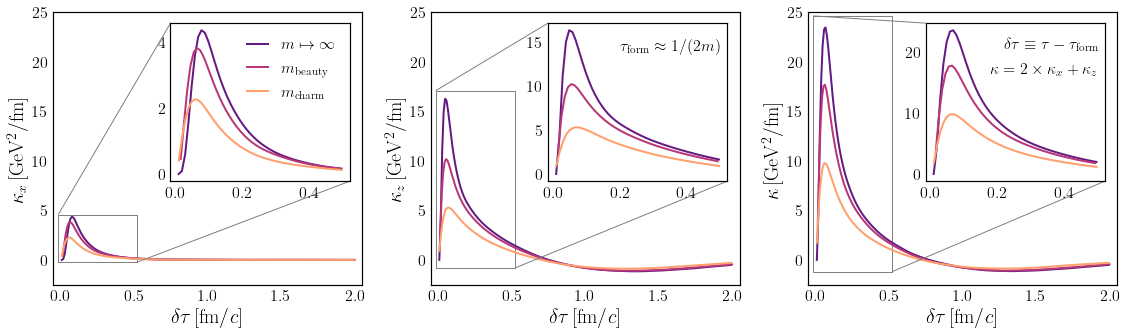

In [4]:
quarks = results_static["quarks"]

cmap_rb = mpl.cm.get_cmap('magma')
colors = [cmap_rb(0.3), cmap_rb(0.5), cmap_rb(0.8)]

fig, ax = plt.subplots(1, 3)
# list of inset axes
ax_in = []
for axi in ax.flat:
    axi_in = axi.inset_axes([0.38,0.38,0.58,0.58])
    ax_in.append(axi_in)
    mark_inset(axi, axi_in, loc1=2, loc2=4, fc="none", ec='0.5')

# compute + plot kappa components for static quarks (EE Glasma correlator)
for iq, quark in enumerate(quarks):
    tag_static_quark = quarks[iq]
    tau_static_quark = np.array(tau_static[tag_static_quark])
    tau_diff = tau_static_quark[1:len(tau_static_quark)]

    mom_broad_x = mom_broad_static[tag_static_quark][:, 0]/DR
    kappa_x = np.diff(mom_broad_x) / np.diff(tau_static_quark)
    ax[0].plot(tau_diff, kappa_x, linewidth=2, color=colors[iq])

    mom_broad_z = mom_broad_static[tag_static_quark][:, 2]/DR
    kappa_z = np.diff(mom_broad_z) / np.diff(tau_static_quark)
    ax[1].plot(tau_diff, kappa_z, linewidth=2, color=colors[iq])

    kappa = 2*kappa_x + kappa_z
    ax[2].plot(tau_diff, kappa, linewidth=2, color=colors[iq])

    # inset axes
    tau_lim = 0.5
    ax_in[0].plot(tau_diff[tau_diff<tau_lim], kappa_x[tau_diff<tau_lim], linewidth=2, color=colors[iq])
    ax_in[1].plot(tau_diff[tau_diff<tau_lim], kappa_z[tau_diff<tau_lim], linewidth=2, color=colors[iq])
    ax_in[2].plot(tau_diff[tau_diff<tau_lim], kappa[tau_diff<tau_lim], linewidth=2, color=colors[iq])


# plot style 
ylabels = [r'$\kappa_x\,\mathrm{[GeV^2/fm]}$', r'$\kappa_z\,\mathrm{[GeV^2/fm]}$', r'$\kappa\,\mathrm{[GeV^2/fm]}$']

for i in range(3):
    ax[i].set_ylabel(ylabels[i])
    ax[i].set_xlabel(r'$\delta\tau\,\mathrm{[fm/}c\mathrm{]}$')
    ax[i].set_xlim(-0.05, 2.05)
    ax[i].set_ylim(-2.5, 25)

    ax[i].tick_params(axis=u'both', which=u'both',length=0)
    ax_in[i].tick_params(axis=u'both', which=u'both',length=0)

# legends
handles, labels = ax_in[0].get_legend_handles_labels()
kappa_lines = []
labels = [r'$m\mapsto\infty$', r'$m_\mathrm{beauty}$', r'$m_\mathrm{charm}$']
for iq, quark in enumerate(quarks):
    line = Line2D([0], [0], label=labels[iq], color=colors[iq], linewidth=2)
    kappa_lines.append(line)

handles.extend(kappa_lines)
ax_in[0].legend(handles=handles, fontsize=16)

# text
ax_in[1].text(0.2, 14, r'$\tau_\mathrm{form}\approx 1/(2m)$', size=16)
ax_in[2].text(0.22, 20.5, r'$\delta\tau\equiv\tau-\tau_\mathrm{form}$', size=16)
ax_in[2].text(0.18, 16.5, r'$\kappa=2\times\kappa_x+\kappa_z$', size=16)

plt.subplots_adjust(wspace=0.05, hspace=0)
plt.tight_layout()

plt.savefig('kappa_glasma_static_quarks.pdf', format='pdf')